In [1]:
#---------librerias-------
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [28]:
# Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalizar los datos de entrada (los valores de los píxeles estarán entre 0 y 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a formato one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [3]:
# Definir el modelo de la red neuronal convolucional
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Capa convolucional con 32 filtros de 3x3
    MaxPooling2D((2, 2)),  # Capa de MaxPooling con tamaño de 2x2
    Conv2D(64, (3, 3), activation='relu'),  # Segunda capa convolucional con 64 filtros
    MaxPooling2D((2, 2)),  # Segunda capa de MaxPooling
    Conv2D(128, (3, 3), activation='relu'),  # Tercera capa convolucional con 128 filtros
    Flatten(),  # Aplanar la salida para la capa completamente conectada
    Dense(128, activation='relu'),  # Capa totalmente conectada con 128 neuronas
    Dropout(0.5),  # Dropout para reducir el sobreajuste
    Dense(10, activation='softmax')  # Capa de salida con activación softmax para clasificación de 10 clases
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 104ms/step - accuracy: 0.2815 - loss: 1.9146 - val_accuracy: 0.5240 - val_loss: 1.3188
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.5150 - loss: 1.3511 - val_accuracy: 0.6042 - val_loss: 1.1254
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 104ms/step - accuracy: 0.5904 - loss: 1.1706 - val_accuracy: 0.5940 - val_loss: 1.1448
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 100ms/step - accuracy: 0.6295 - loss: 1.0588 - val_accuracy: 0.6733 - val_loss: 0.9264
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 98ms/step - accuracy: 0.6696 - loss: 0.9531 - val_accuracy: 0.6748 - val_loss: 0.9275
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 95ms/step - accuracy: 0.6925 - loss: 0.8855 - val_accuracy: 0.6937 - val_loss: 0.8797
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.7180 - loss: 0.8169 - val_accuracy: 0.7068 - val_loss: 0.8580
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 95ms/step - accuracy: 0.7354 - loss: 0.76

Exactitud en el conjunto de prueba: 0.74


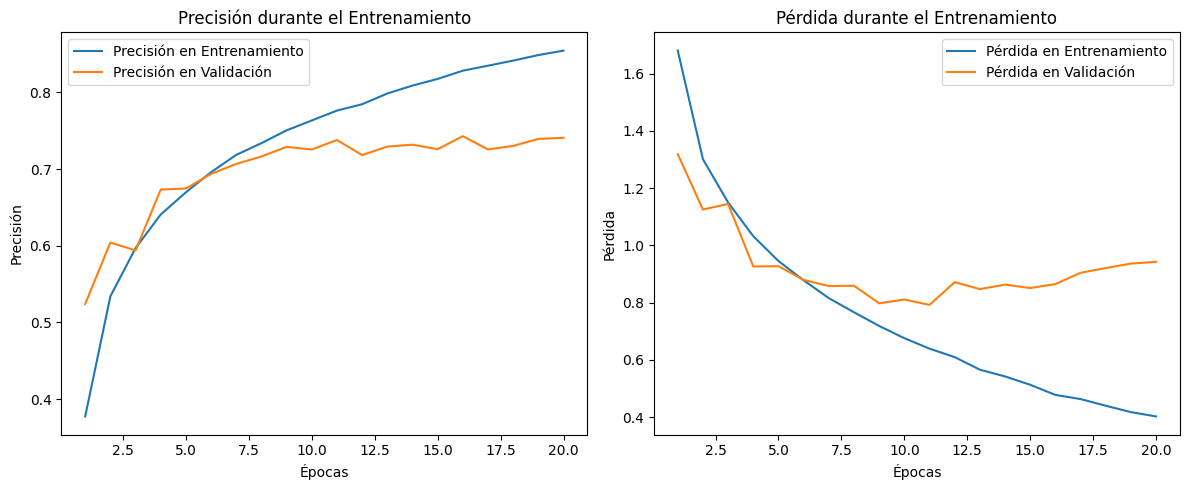

In [4]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Exactitud en el conjunto de prueba: {test_acc:.2f}")

# Graficar la precisión y la pérdida del entrenamiento
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

# Gráfico de la precisión
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(epochs, history.history['val_accuracy'], label='Precisión en Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de la pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(epochs, history.history['val_loss'], label='Pérdida en Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


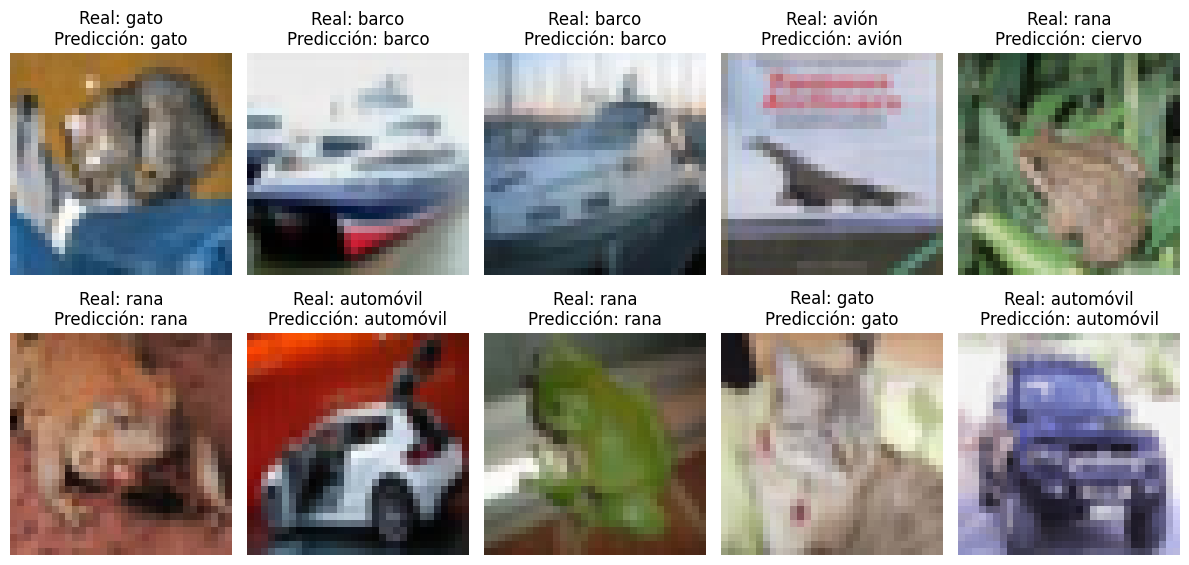

In [30]:

#print("clases de prueba", np.argmax(y_test,axis=1))

# Diccionario de clases para CIFAR-10
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']
#print(f"Real: {class_names[int(y_test[1][0])]}\nPredicción: {class_names[y_pred_classes[1]]}")

# Mostrar las primeras 10 imágenes del conjunto de prueba junto con sus predicciones
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])
    plt.title(f"Real: {class_names[y_test[i]]}\nPredicción: {class_names[y_pred_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()